In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sp
from time import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import pairwise_distances
from scipy.stats.stats import pearsonr
import graphlab
from sklearn.cross_validation import train_test_split
from math import sqrt
import scipy.sparse as sp
from scipy.sparse.linalg import svds
%matplotlib inline

/home/anusha/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from pattern.vector import stem, PORTER, LEMMA
punctuation = list(".,;:!?()[]{}`'\"@#$^&*+-|=~_")
from mrjob.job import MRJob
from collections import Counter, defaultdict
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import gensim
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim import corpora
from sklearn.utils import shuffle

This non-commercial license of GraphLab Create for academic use is assigned to anushadevimohan@gmail.com and will expire on July 27, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1504546205.log
Using TensorFlow backend.


In [3]:
df = pd.read_csv("processed_data.csv")

In [4]:
reg = df[df["user_review_count"] > 2]
reg.shape

(47583, 36)

In [5]:
n_users = reg.userid.nunique()
n_items = reg.course_id.nunique()

In [6]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
validate_df = pd.read_csv("validation.csv")

In [7]:
train_df = train_df[["new_course_id", "new_user_id", "rating"]]
validate_df = validate_df[["new_course_id", "new_user_id", "rating"]]
test_df = test_df[["new_course_id", "new_user_id", "rating"]]

In [8]:
sf_train = graphlab.SFrame(train_df)
sf_validation = graphlab.SFrame(validate_df)
sf_test = graphlab.SFrame(test_df)

In [9]:
predictions_train_dic = {}
predictions_valid_dic = {}

for i in xrange(4, 20, 2):
    model = graphlab.recommender.factorization_recommender.create(sf_train, user_id='new_user_id', item_id='new_course_id',target='rating',solver='als',side_data_factorization=False, num_factors = i)
    predictions_train = model.predict(sf_train)
    predictions_valid = model.predict(sf_validation)
    predictions_train_dic[i] = np.sqrt(mean_squared_error(sf_train['rating'], predictions_train))
    predictions_valid_dic[i] = np.sqrt(mean_squared_error(sf_validation['rating'], predictions_valid))

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.033825s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 4        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 75us         | NA                     |

+---------+--------------+------------------------+

| 0       | 39.083ms     | 0.285221               |

| 1       | 48.849ms     | 0.0775431              |

| 2       | 84.732ms     | 0.0680248              |

| 3       | 99.749ms     | 0.0623174              |

| 4       | 127.248ms    | 0.0585538              |

| 5       | 158.354ms    | 0.0558004              |

| 6       | 177.799ms    | 0.0535762              |

| 7       | 193.5ms      | 0.0514471              |

| 8       | 215.762ms    | 0.0495568              |

| 9       | 239.763ms    | 0.0481039              |

| 10      | 267.264ms    | 0.0469125              |

| 11      | 297.594ms    | 0.0458987              |

| 12      | 319.566ms    | 0.0450104              |

| 13      | 339.53ms     | 0.0442184              |

| 14      | 358.066ms    | 0.0435007              |

| 15      | 385.51ms     | 0.0428381              |

| 16      | 413.787ms    | 0.0422151              |

| 17      | 440.648ms    | 0.0416332              |

| 18      | 467.767ms    | 0.0410789              |

| 19      | 495.255ms    | 0.0405381              |

| 20      | 527.988ms    | 0.0399978              |

| 21      | 541.125ms    | 0.0394473              |

| 22      | 574.993ms    | 0.0388857              |

| 23      | 594.168ms    | 0.0383426              |

| 24      | 619.264ms    | 0.0378688              |

| 25      | 634.196ms    | 0.0374748              |

| 26      | 654.702ms    | 0.0371316              |

| 27      | 669.588ms    | 0.0368155              |

| 28      | 692.307ms    | 0.0365155              |

| 29      | 712.005ms    | 0.0362264              |

| 30      | 730.313ms    | 0.0359443              |

| 31      | 754.734ms    | 0.0356668              |

| 32      | 774.838ms    | 0.0353926              |

| 33      | 790.959ms    | 0.0351239              |

| 34      | 812.498ms    | 0.0348629              |

| 35      | 832.119ms    | 0.0346109              |

| 36      | 854.399ms    | 0.0343664              |

| 37      | 884.892ms    | 0.0341281              |

| 38      | 907.62ms     | 0.0338948              |

| 39      | 932.689ms    | 0.0336661              |

| 40      | 945.96ms     | 0.033442               |

| 41      | 972.775ms    | 0.0332221              |

| 42      | 1.00s        | 0.0330056              |

| 43      | 1.03s        | 0.0327911              |

| 44      | 1.05s        | 0.0325777              |

| 45      | 1.07s        | 0.0323649              |

| 46      | 1.09s        | 0.0321528              |

| 47      | 1.11s        | 0.0319418              |

| 48      | 1.13s        | 0.0317322              |

| 49      | 1.16s        | 0.031522               |

| FINAL   | 1.16s        | 0.031522               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.03115s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 6        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 41us         | NA                     |

+---------+--------------+------------------------+

| 0       | 31.083ms     | 0.227184               |

| 1       | 48.571ms     | 0.0311389              |

| 2       | 76.91ms      | 0.0257707              |

| 3       | 98.39ms      | 0.0228111              |

| 4       | 127.585ms    | 0.0206829              |

| 5       | 155.259ms    | 0.019059               |

| 6       | 182.144ms    | 0.0177285              |

| 7       | 198.984ms    | 0.016588               |

| 8       | 220.44ms     | 0.0155784              |

| 9       | 242.148ms    | 0.0146798              |

| 10      | 268.853ms    | 0.0138813              |

| 11      | 292.741ms    | 0.013171               |

| 12      | 316.216ms    | 0.0125415              |

| 13      | 340.77ms     | 0.0119914              |

| 14      | 364.614ms    | 0.011503               |

| 15      | 403.746ms    | 0.0110676              |

| 16      | 433.016ms    | 0.0106741              |

| 17      | 449.268ms    | 0.0103157              |

| 18      | 468.742ms    | 0.00998614             |

| 19      | 490.15ms     | 0.00968157             |

| 20      | 517.102ms    | 0.00939814             |

| 21      | 541.56ms     | 0.00913468             |

| 22      | 560.104ms    | 0.00888909             |

| 23      | 587.278ms    | 0.0086595              |

| 24      | 607.715ms    | 0.00844439             |

| 25      | 631.551ms    | 0.00824352             |

| 26      | 653.833ms    | 0.00805543             |

| 27      | 677.629ms    | 0.00787923             |

| 28      | 704.75ms     | 0.00771343             |

| 29      | 723.109ms    | 0.00755816             |

| 30      | 747.503ms    | 0.00741148             |

| 31      | 771.712ms    | 0.00727308             |

| 32      | 796.748ms    | 0.00714238             |

| 33      | 821.248ms    | 0.00701846             |

| 34      | 848.863ms    | 0.00690091             |

| 35      | 875.335ms    | 0.00678908             |

| 36      | 898.363ms    | 0.00668246             |

| 37      | 926.154ms    | 0.00658071             |

| 38      | 960.006ms    | 0.00648351             |

| 39      | 979.433ms    | 0.00639028             |

| 40      | 1.00s        | 0.00630053             |

| 41      | 1.02s        | 0.00621407             |

| 42      | 1.05s        | 0.00613076             |

| 43      | 1.08s        | 0.00605018             |

| 44      | 1.10s        | 0.00597218             |

| 45      | 1.12s        | 0.00589655             |

| 46      | 1.14s        | 0.00582294             |

| 47      | 1.18s        | 0.00575128             |

| 48      | 1.21s        | 0.0056813              |

| 49      | 1.24s        | 0.00561295             |

| FINAL   | 1.24s        | 0.00561295             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.036399s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 46us         | NA                     |

+---------+--------------+------------------------+

| 0       | 41.775ms     | 0.182218               |

| 1       | 68.938ms     | 0.0142136              |

| 2       | 102.951ms    | 0.0104969              |

| 3       | 123.471ms    | 0.00897523             |

| 4       | 143.432ms    | 0.00796631             |

| 5       | 159.761ms    | 0.00722346             |

| 6       | 192.597ms    | 0.00663719             |

| 7       | 219.605ms    | 0.00614906             |

| 8       | 258.932ms    | 0.00573376             |

| 9       | 273.1ms      | 0.00536908             |

| 10      | 294.509ms    | 0.00504813             |

| 11      | 314.824ms    | 0.00476112             |

| 12      | 339.788ms    | 0.00450599             |

| 13      | 363.875ms    | 0.00427527             |

| 14      | 382.542ms    | 0.00406529             |

| 15      | 400.136ms    | 0.00387359             |

| 16      | 432.526ms    | 0.00369666             |

| 17      | 462.271ms    | 0.00353214             |

| 18      | 493.2ms      | 0.00337846             |

| 19      | 511.691ms    | 0.0032346              |

| 20      | 537.418ms    | 0.00309877             |

| 21      | 570.11ms     | 0.00297181             |

| 22      | 598.534ms    | 0.00285204             |

| 23      | 621.505ms    | 0.00273939             |

| 24      | 648.094ms    | 0.00263287             |

| 25      | 672.246ms    | 0.00253319             |

| 26      | 700.955ms    | 0.00243973             |

| 27      | 718.525ms    | 0.00235216             |

| 28      | 734.355ms    | 0.00227052             |

| 29      | 765.041ms    | 0.0021938              |

| 30      | 789.825ms    | 0.00212153             |

| 31      | 816.219ms    | 0.00205437             |

| 32      | 834.574ms    | 0.0019915              |

| 33      | 857.643ms    | 0.00193251             |

| 34      | 882.379ms    | 0.00187746             |

| 35      | 907.012ms    | 0.00182547             |

| 36      | 918.405ms    | 0.00177667             |

| 37      | 941.76ms     | 0.00173073             |

| 38      | 970.474ms    | 0.0016875              |

| 39      | 1.00s        | 0.00164678             |

| 40      | 1.01s        | 0.0016081              |

| 41      | 1.05s        | 0.00157148             |

| 42      | 1.06s        | 0.00153693             |

| 43      | 1.09s        | 0.00150395             |

| 44      | 1.11s        | 0.00147265             |

| 45      | 1.13s        | 0.00144279             |

| 46      | 1.16s        | 0.00141426             |

| 47      | 1.19s        | 0.00138665             |

| 48      | 1.22s        | 0.00136058             |

| 49      | 1.25s        | 0.00133571             |

| FINAL   | 1.25s        | 0.00133571             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.02992s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 43us         | NA                     |

+---------+--------------+------------------------+

| 0       | 50.929ms     | 0.152221               |

| 1       | 72.774ms     | 0.00589157             |

| 2       | 107.562ms    | 0.00414235             |

| 3       | 136.489ms    | 0.00328787             |

| 4       | 163.083ms    | 0.00273528             |

| 5       | 191.017ms    | 0.00235629             |

| 6       | 218.329ms    | 0.00209075             |

| 7       | 246.679ms    | 0.00190271             |

| 8       | 276.444ms    | 0.00176579             |

| 9       | 298.004ms    | 0.00166311             |

| 10      | 326.893ms    | 0.00158102             |

| 11      | 350.321ms    | 0.00151304             |

| 12      | 379.116ms    | 0.0014556              |

| 13      | 400.178ms    | 0.00140542             |

| 14      | 429.289ms    | 0.00136098             |

| 15      | 466.921ms    | 0.00132008             |

| 16      | 488.014ms    | 0.00128325             |

| 17      | 514.482ms    | 0.00124898             |

| 18      | 533.472ms    | 0.00121708             |

| 19      | 557.8ms      | 0.00118721             |

| 20      | 588.889ms    | 0.00115964             |

| 21      | 615.883ms    | 0.00113314             |

| 22      | 641.4ms      | 0.00110826             |

| 23      | 668.437ms    | 0.00108541             |

| 24      | 692.087ms    | 0.00106297             |

| 25      | 711.263ms    | 0.00104163             |

| 26      | 740.166ms    | 0.00102154             |

| 27      | 762.564ms    | 0.00100217             |

| 28      | 788.142ms    | 0.000983897            |

| 29      | 808.437ms    | 0.000966291            |

| 30      | 834.57ms     | 0.00094907             |

| 31      | 864.447ms    | 0.000933228            |

| 32      | 892.134ms    | 0.000917505            |

| 33      | 909.52ms     | 0.000902254            |

| 34      | 942.556ms    | 0.000887824            |

| 35      | 966.447ms    | 0.000873879            |

| 36      | 990.605ms    | 0.000860697            |

| 37      | 1.01s        | 0.000847613            |

| 38      | 1.04s        | 0.000835206            |

| 39      | 1.07s        | 0.000822972            |

| 40      | 1.10s        | 0.000811238            |

| 41      | 1.12s        | 0.000799823            |

| 42      | 1.17s        | 0.000788845            |

| 43      | 1.20s        | 0.00077807             |

| 44      | 1.23s        | 0.000767752            |

| 45      | 1.26s        | 0.000757541            |

| 46      | 1.29s        | 0.000747738            |

| 47      | 1.31s        | 0.000738258            |

| 48      | 1.33s        | 0.00072915             |

| 49      | 1.36s        | 0.000720103            |

| FINAL   | 1.36s        | 0.000720103            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.033964s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 12       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 54us         | NA                     |

+---------+--------------+------------------------+

| 0       | 29.406ms     | 0.138457               |

| 1       | 61.047ms     | 0.00398714             |

| 2       | 97.477ms     | 0.00193213             |

| 3       | 137.589ms    | 0.00145303             |

| 4       | 169.865ms    | 0.00126047             |

| 5       | 200.551ms    | 0.00115107             |

| 6       | 226.064ms    | 0.00108162             |

| 7       | 250.73ms     | 0.00103027             |

| 8       | 278.402ms    | 0.000988678            |

| 9       | 306.343ms    | 0.000953125            |

| 10      | 332.26ms     | 0.000923887            |

| 11      | 357.025ms    | 0.000896041            |

| 12      | 390.56ms     | 0.000872665            |

| 13      | 424.438ms    | 0.00085033             |

| 14      | 449.042ms    | 0.000828817            |

| 15      | 479.781ms    | 0.000809643            |

| 16      | 512.575ms    | 0.000791121            |

| 17      | 547.489ms    | 0.000773971            |

| 18      | 569.922ms    | 0.000758705            |

| 19      | 602.913ms    | 0.00074341             |

| 20      | 638.625ms    | 0.000728805            |

| 21      | 670.175ms    | 0.000715393            |

| 22      | 692.331ms    | 0.00070201             |

| 23      | 725.79ms     | 0.000689984            |

| 24      | 742.869ms    | 0.00067804             |

| 25      | 769.191ms    | 0.000666739            |

| 26      | 803.273ms    | 0.000655797            |

| 27      | 831.322ms    | 0.000645233            |

| 28      | 862.559ms    | 0.000635484            |

| 29      | 901.592ms    | 0.000626142            |

| 30      | 920.689ms    | 0.000616146            |

| 31      | 937.907ms    | 0.000606608            |

| 32      | 965.677ms    | 0.000597366            |

| 33      | 999.471ms    | 0.000588896            |

| 34      | 1.02s        | 0.000580535            |

| 35      | 1.05s        | 0.000572355            |

| 36      | 1.07s        | 0.000564581            |

| 37      | 1.10s        | 0.000556503            |

| 38      | 1.12s        | 0.00054907             |

| 39      | 1.16s        | 0.000542083            |

| 40      | 1.19s        | 0.000535474            |

| 41      | 1.21s        | 0.00052861             |

| 42      | 1.25s        | 0.000521989            |

| 43      | 1.27s        | 0.000515688            |

| 44      | 1.31s        | 0.000509875            |

| 45      | 1.34s        | 0.000503968            |

| 46      | 1.36s        | 0.000498233            |

| 47      | 1.38s        | 0.000492814            |

| 48      | 1.41s        | 0.000487392            |

| 49      | 1.44s        | 0.000482397            |

| FINAL   | 1.44s        | 0.000482397            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.032297s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 14       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 77us         | NA                     |

+---------+--------------+------------------------+

| 0       | 42.504ms     | 0.124015               |

| 1       | 80.9ms       | 0.0025368              |

| 2       | 113.366ms    | 0.00135453             |

| 3       | 147.756ms    | 0.00107859             |

| 4       | 187.956ms    | 0.000958341            |

| 5       | 213.848ms    | 0.000883806            |

| 6       | 252.422ms    | 0.000829975            |

| 7       | 275.338ms    | 0.000786785            |

| 8       | 318.244ms    | 0.000749963            |

| 9       | 344.905ms    | 0.000719503            |

| 10      | 365.997ms    | 0.000690994            |

| 11      | 402.107ms    | 0.000668516            |

| 12      | 429.396ms    | 0.000647586            |

| 13      | 461.02ms     | 0.00062808             |

| 14      | 488.582ms    | 0.000610692            |

| 15      | 527.291ms    | 0.000595225            |

| 16      | 548.492ms    | 0.000578896            |

| 17      | 587.629ms    | 0.000564703            |

| 18      | 627.018ms    | 0.000550804            |

| 19      | 665.643ms    | 0.000538479            |

| 20      | 705.305ms    | 0.000528009            |

| 21      | 752.09ms     | 0.000517961            |

| 22      | 796.215ms    | 0.00051085             |

| 23      | 842.793ms    | 0.000496867            |

| 24      | 880.284ms    | 0.000486702            |

| 25      | 911.09ms     | 0.000477901            |

| 26      | 950.721ms    | 0.000470025            |

| 27      | 989.372ms    | 0.000460868            |

| 28      | 1.02s        | 0.000453352            |

| 29      | 1.04s        | 0.000448503            |

| 30      | 1.08s        | 0.000441389            |

| 31      | 1.13s        | 0.000435164            |

| 32      | 1.16s        | 0.000428929            |

| 33      | 1.19s        | 0.000422539            |

| 34      | 1.23s        | 0.000418263            |

| 35      | 1.27s        | 0.000411499            |

| 36      | 1.30s        | 0.000405291            |

| 37      | 1.35s        | 0.000399126            |

| 38      | 1.39s        | 0.000393805            |

| 39      | 1.43s        | 0.000389024            |

| 40      | 1.47s        | 0.000384476            |

| 41      | 1.51s        | 0.00037966             |

| 42      | 1.56s        | 0.000374964            |

| 43      | 1.59s        | 0.000370337            |

| 44      | 1.62s        | 0.000365823            |

| 45      | 1.66s        | 0.000362413            |

| 46      | 1.68s        | 0.000357805            |

| 47      | 1.73s        | 0.00035346             |

| 48      | 1.76s        | 0.000349579            |

| 49      | 1.78s        | 0.000345556            |

| FINAL   | 1.78s        | 0.000345556            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.03489s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 16       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 82us         | NA                     |

+---------+--------------+------------------------+

| 0       | 44.022ms     | 0.107556               |

| 1       | 88.088ms     | 0.00094262             |

| 2       | 131.193ms    | 0.000940644            |

| 3       | 169.637ms    | 0.000848247            |

| 4       | 208.187ms    | 0.000777893            |

| 5       | 242.37ms     | 0.000725183            |

| 6       | 278.675ms    | 0.000694462            |

| 7       | 318.242ms    | 0.000735692            |

| 8       | 364.733ms    | 0.000605605            |

| 9       | 400.143ms    | 0.000566889            |

| 10      | 444.823ms    | 0.000571259            |

| 11      | 469.411ms    | 0.000507481            |

| 12      | 489.348ms    | 0.000550595            |

| 13      | 522.228ms    | 0.000521861            |

| 14      | 560.165ms    | 0.000546289            |

| 15      | 595.169ms    | 0.00048638             |

| 16      | 630.644ms    | 0.00049756             |

| 17      | 675.837ms    | 0.000488504            |

| 18      | 706.463ms    | 0.000432499            |

| 19      | 740.829ms    | 0.000489278            |

| 20      | 772.267ms    | 0.000470022            |

| 21      | 805.791ms    | 0.000470517            |

| 22      | 840.745ms    | 0.000471074            |

| 23      | 884.269ms    | 0.00040388             |

| 24      | 911.565ms    | 0.000407874            |

| 25      | 942.33ms     | 0.000414113            |

| 26      | 978.134ms    | 0.000424863            |

| 27      | 1.01s        | 0.000401334            |

| 28      | 1.04s        | 0.000396081            |

| 29      | 1.08s        | 0.000387569            |

| 30      | 1.12s        | 0.0003629              |

| 31      | 1.15s        | 0.000370275            |

| 32      | 1.18s        | 0.000365041            |

| 33      | 1.22s        | 0.000356151            |

| 34      | 1.26s        | 0.000358784            |

| 35      | 1.29s        | 0.000344363            |

| 36      | 1.32s        | 0.000349075            |

| 37      | 1.35s        | 0.000336973            |

| 38      | 1.39s        | 0.000325811            |

| 39      | 1.43s        | 0.000333693            |

| 40      | 1.47s        | 0.000320483            |

| 41      | 1.50s        | 0.000319946            |

| 42      | 1.54s        | 0.000321154            |

| 43      | 1.57s        | 0.000318972            |

| 44      | 1.61s        | 0.000309053            |

| 45      | 1.64s        | 0.000301896            |

| 46      | 1.67s        | 0.000298974            |

| 47      | 1.71s        | 0.000293733            |

| 48      | 1.74s        | 0.000299787            |

| 49      | 1.77s        | 0.000290319            |

| FINAL   | 1.77s        | 0.000290319            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.036755s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 18       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 52us         | NA                     |

+---------+--------------+------------------------+

| 0       | 55.093ms     | 0.10494                |

| 1       | 96.625ms     | 0.000653137            |

| 2       | 131.916ms    | 0.000510546            |

| 3       | 177.344ms    | 0.000465243            |

| 4       | 213.051ms    | 0.000431588            |

| 5       | 253.52ms     | 0.00040759             |

| 6       | 276.049ms    | 0.000385346            |

| 7       | 318.325ms    | 0.000360088            |

| 8       | 349.194ms    | 0.000346961            |

| 9       | 380.545ms    | 0.000337476            |

| 10      | 413.551ms    | 0.000329213            |

| 11      | 454.03ms     | 0.000321651            |

| 12      | 496.279ms    | 0.000315334            |

| 13      | 530.899ms    | 0.000308954            |

| 14      | 565.815ms    | 0.000303               |

| 15      | 606.76ms     | 0.000297996            |

| 16      | 649.567ms    | 0.000293334            |

| 17      | 689.636ms    | 0.000288997            |

| 18      | 720.757ms    | 0.000284841            |

| 19      | 766.688ms    | 0.000281263            |

| 20      | 822.422ms    | 0.000277233            |

| 21      | 867.06ms     | 0.000273042            |

| 22      | 921.071ms    | 0.000269568            |

| 23      | 966.791ms    | 0.000265667            |

| 24      | 1.00s        | 0.000262104            |

| 25      | 1.04s        | 0.000259099            |

| 26      | 1.08s        | 0.000256047            |

| 27      | 1.12s        | 0.00025272             |

| 28      | 1.15s        | 0.000250057            |

| 29      | 1.19s        | 0.000247491            |

| 30      | 1.23s        | 0.000245156            |

| 31      | 1.27s        | 0.00024257             |

| 32      | 1.30s        | 0.000239846            |

| 33      | 1.34s        | 0.000237246            |

| 34      | 1.38s        | 0.00023481             |

| 35      | 1.42s        | 0.000232371            |

| 36      | 1.46s        | 0.000230002            |

| 37      | 1.50s        | 0.000227669            |

| 38      | 1.53s        | 0.000225631            |

| 39      | 1.56s        | 0.000223397            |

| 40      | 1.59s        | 0.000221711            |

| 41      | 1.63s        | 0.00021944             |

| 42      | 1.67s        | 0.000217624            |

| 43      | 1.70s        | 0.000215491            |

| 44      | 1.74s        | 0.000213703            |

| 45      | 1.78s        | 0.000212159            |

| 46      | 1.82s        | 0.00021002             |

| 47      | 1.85s        | 0.000208018            |

| 48      | 1.89s        | 0.000206397            |

| 49      | 1.93s        | 0.000204791            |

| FINAL   | 1.93s        | 0.000204791            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [10]:
predictions_train_dic

{4: 0.03152200045102501,
 6: 0.0056129473090075089,
 8: 0.0013357143238090208,
 10: 0.00072010302151401728,
 12: 0.00048239722951299533,
 14: 0.00034555613852417554,
 16: 0.00029031852761791758,
 18: 0.0002047907401923988}

In [11]:
predictions_valid_dic

{4: 0.82280316490371674,
 6: 0.73761529643646651,
 8: 0.74598745649919951,
 10: 0.70722984018991419,
 12: 0.68364321170700992,
 14: 0.73393361604101703,
 16: 0.71287624266101868,
 18: 0.78426904536002107}

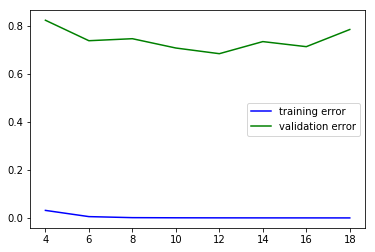

In [12]:
plt.plot(predictions_train_dic.keys(), predictions_train_dic.values(), color = "b", label = "training error")
plt.plot(predictions_valid_dic.keys(), predictions_valid_dic.values(), color = "g", label = "validation error")
plt.legend()

In [13]:

predictions_train_dic = {}
predictions_valid_dic = {}

for i in [100, 1, 0.1, 0.01, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0]:
    model = graphlab.recommender.factorization_recommender.create(sf_train, user_id='new_user_id', item_id='new_course_id',target='rating',solver='als',side_data_factorization=False, num_factors = 10, regularization=i)
    predictions_train = model.predict(sf_train)
    predictions_valid = model.predict(sf_validation)
    predictions_train_dic[i] = np.sqrt(mean_squared_error(sf_train['rating'], predictions_train))
    predictions_valid_dic[i] = np.sqrt(mean_squared_error(sf_validation['rating'], predictions_valid))
    

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.036264s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 100      |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 53us         | NA                     |

+---------+--------------+------------------------+

| 0       | 33.954ms     | 0.598309               |

| 1       | 71.892ms     | 0.598309               |

| 2       | 99.866ms     | 0.598309               |

| 3       | 134.919ms    | 0.598309               |

| 4       | 161.099ms    | 0.598309               |

| 5       | 189.479ms    | 0.598309               |

| 6       | 223.599ms    | 0.598309               |

| 7       | 249.042ms    | 0.598309               |

| 8       | 281.819ms    | 0.598309               |

| 9       | 307.465ms    | 0.598309               |

| 10      | 338.441ms    | 0.598309               |

| 11      | 370.553ms    | 0.598309               |

| 12      | 387.028ms    | 0.598309               |

| 13      | 404.808ms    | 0.598309               |

| 14      | 442.317ms    | 0.598309               |

| 15      | 471.606ms    | 0.598309               |

| 16      | 497.521ms    | 0.598309               |

| 17      | 519.726ms    | 0.598309               |

| 18      | 535.11ms     | 0.598309               |

| 19      | 559.917ms    | 0.598309               |

| 20      | 590.004ms    | 0.598309               |

| 21      | 611.095ms    | 0.598309               |

| 22      | 641.302ms    | 0.598309               |

| 23      | 661.009ms    | 0.598309               |

| 24      | 681.73ms     | 0.598309               |

| 25      | 711.987ms    | 0.598309               |

| 26      | 750.625ms    | 0.598309               |

| 27      | 784.597ms    | 0.598309               |

| 28      | 808.397ms    | 0.598309               |

| 29      | 826.42ms     | 0.598309               |

| 30      | 866.638ms    | 0.598309               |

| 31      | 900.886ms    | 0.598309               |

| 32      | 936.252ms    | 0.598309               |

| 33      | 976.245ms    | 0.598309               |

| 34      | 1.01s        | 0.598309               |

| 35      | 1.04s        | 0.598309               |

| 36      | 1.05s        | 0.598309               |

| 37      | 1.08s        | 0.598309               |

| 38      | 1.11s        | 0.598309               |

| 39      | 1.15s        | 0.598309               |

| 40      | 1.17s        | 0.598309               |

| 41      | 1.20s        | 0.598309               |

| 42      | 1.23s        | 0.598309               |

| 43      | 1.25s        | 0.598309               |

| 44      | 1.28s        | 0.598309               |

| 45      | 1.29s        | 0.598309               |

| 46      | 1.32s        | 0.598309               |

| 47      | 1.35s        | 0.598309               |

| 48      | 1.37s        | 0.598309               |

| 49      | 1.40s        | 0.598309               |

| FINAL   | 1.40s        | 0.598309               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.031131s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1        |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 51us         | NA                     |

+---------+--------------+------------------------+

| 0       | 30.229ms     | 0.598309               |

| 1       | 53.069ms     | 0.598309               |

| 2       | 99.907ms     | 0.598309               |

| 3       | 124.814ms    | 0.598309               |

| 4       | 157.424ms    | 0.598309               |

| 5       | 196.484ms    | 0.598309               |

| 6       | 226.128ms    | 0.598309               |

| 7       | 250.278ms    | 0.598309               |

| 8       | 282.179ms    | 0.598309               |

| 9       | 301.461ms    | 0.598309               |

| 10      | 338.264ms    | 0.598309               |

| 11      | 366.208ms    | 0.598309               |

| 12      | 407.911ms    | 0.598309               |

| 13      | 440.188ms    | 0.598309               |

| 14      | 493.304ms    | 0.598309               |

| 15      | 520.877ms    | 0.598309               |

| 16      | 556.896ms    | 0.598309               |

| 17      | 583.56ms     | 0.598309               |

| 18      | 610.09ms     | 0.598309               |

| 19      | 647.481ms    | 0.598309               |

| 20      | 681.599ms    | 0.598309               |

| 21      | 713.707ms    | 0.598309               |

| 22      | 738.407ms    | 0.598309               |

| 23      | 764.678ms    | 0.598309               |

| 24      | 816.409ms    | 0.598309               |

| 25      | 840.59ms     | 0.598309               |

| 26      | 863.447ms    | 0.598309               |

| 27      | 897.407ms    | 0.598309               |

| 28      | 925.78ms     | 0.598309               |

| 29      | 958.593ms    | 0.598309               |

| 30      | 995.462ms    | 0.598309               |

| 31      | 1.02s        | 0.598309               |

| 32      | 1.05s        | 0.598309               |

| 33      | 1.07s        | 0.598309               |

| 34      | 1.11s        | 0.598309               |

| 35      | 1.14s        | 0.598309               |

| 36      | 1.17s        | 0.598309               |

| 37      | 1.20s        | 0.598309               |

| 38      | 1.23s        | 0.598309               |

| 39      | 1.25s        | 0.598309               |

| 40      | 1.29s        | 0.598309               |

| 41      | 1.32s        | 0.598309               |

| 42      | 1.35s        | 0.598309               |

| 43      | 1.37s        | 0.598309               |

| 44      | 1.41s        | 0.598309               |

| 45      | 1.44s        | 0.598309               |

| 46      | 1.48s        | 0.598309               |

| 47      | 1.51s        | 0.598309               |

| 48      | 1.55s        | 0.598309               |

| 49      | 1.58s        | 0.598309               |

| FINAL   | 1.58s        | 0.598309               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.034653s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.1      |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 56us         | NA                     |

+---------+--------------+------------------------+

| 0       | 46.831ms     | 0.598309               |

| 1       | 98.983ms     | 0.598309               |

| 2       | 145.603ms    | 0.598309               |

| 3       | 188.255ms    | 0.598309               |

| 4       | 228.366ms    | 0.598309               |

| 5       | 255.158ms    | 0.598309               |

| 6       | 282.71ms     | 0.598309               |

| 7       | 324.762ms    | 0.598309               |

| 8       | 355.171ms    | 0.598309               |

| 9       | 387.057ms    | 0.598309               |

| 10      | 428.755ms    | 0.598309               |

| 11      | 452.115ms    | 0.598309               |

| 12      | 485.097ms    | 0.598309               |

| 13      | 515.736ms    | 0.598309               |

| 14      | 545.391ms    | 0.598309               |

| 15      | 574.773ms    | 0.598309               |

| 16      | 603.537ms    | 0.598309               |

| 17      | 628.529ms    | 0.598309               |

| 18      | 673.515ms    | 0.598309               |

| 19      | 709.572ms    | 0.598309               |

| 20      | 740.143ms    | 0.598309               |

| 21      | 773.402ms    | 0.598309               |

| 22      | 821.372ms    | 0.598309               |

| 23      | 849.28ms     | 0.598309               |

| 24      | 884.551ms    | 0.598309               |

| 25      | 902.538ms    | 0.598309               |

| 26      | 932.045ms    | 0.598309               |

| 27      | 960.51ms     | 0.598309               |

| 28      | 989.809ms    | 0.598309               |

| 29      | 1.01s        | 0.598309               |

| 30      | 1.04s        | 0.598309               |

| 31      | 1.05s        | 0.598309               |

| 32      | 1.09s        | 0.598309               |

| 33      | 1.11s        | 0.598309               |

| 34      | 1.14s        | 0.598309               |

| 35      | 1.17s        | 0.598309               |

| 36      | 1.19s        | 0.598309               |

| 37      | 1.22s        | 0.598309               |

| 38      | 1.25s        | 0.598309               |

| 39      | 1.29s        | 0.598309               |

| 40      | 1.32s        | 0.598309               |

| 41      | 1.35s        | 0.598309               |

| 42      | 1.39s        | 0.598309               |

| 43      | 1.42s        | 0.598309               |

| 44      | 1.45s        | 0.598309               |

| 45      | 1.48s        | 0.598309               |

| 46      | 1.51s        | 0.598309               |

| 47      | 1.55s        | 0.598309               |

| 48      | 1.59s        | 0.598309               |

| 49      | 1.62s        | 0.598309               |

| FINAL   | 1.62s        | 0.598309               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.035774s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.01     |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 45us         | NA                     |

+---------+--------------+------------------------+

| 0       | 46.411ms     | 0.598309               |

| 1       | 78.725ms     | 0.598309               |

| 2       | 123.362ms    | 0.598309               |

| 3       | 169.247ms    | 0.598309               |

| 4       | 205.976ms    | 0.598309               |

| 5       | 253.399ms    | 0.598309               |

| 6       | 301.839ms    | 0.598309               |

| 7       | 338.158ms    | 0.598309               |

| 8       | 361.875ms    | 0.598309               |

| 9       | 379.014ms    | 0.598309               |

| 10      | 405.768ms    | 0.598309               |

| 11      | 441.282ms    | 0.598309               |

| 12      | 489.029ms    | 0.598309               |

| 13      | 535.615ms    | 0.598309               |

| 14      | 576.789ms    | 0.598309               |

| 15      | 620.442ms    | 0.598309               |

| 16      | 660.615ms    | 0.598309               |

| 17      | 689.891ms    | 0.598309               |

| 18      | 717.715ms    | 0.598309               |

| 19      | 749.349ms    | 0.598309               |

| 20      | 776.775ms    | 0.598309               |

| 21      | 809.625ms    | 0.598309               |

| 22      | 836.779ms    | 0.598309               |

| 23      | 866.79ms     | 0.598309               |

| 24      | 887.633ms    | 0.598309               |

| 25      | 920.1ms      | 0.598309               |

| 26      | 951.273ms    | 0.598309               |

| 27      | 975.443ms    | 0.598309               |

| 28      | 1.00s        | 0.598309               |

| 29      | 1.02s        | 0.598309               |

| 30      | 1.05s        | 0.598309               |

| 31      | 1.07s        | 0.598309               |

| 32      | 1.10s        | 0.598309               |

| 33      | 1.12s        | 0.598309               |

| 34      | 1.15s        | 0.598309               |

| 35      | 1.19s        | 0.598309               |

| 36      | 1.22s        | 0.598309               |

| 37      | 1.25s        | 0.598309               |

| 38      | 1.27s        | 0.598309               |

| 39      | 1.31s        | 0.598309               |

| 40      | 1.34s        | 0.598309               |

| 41      | 1.38s        | 0.598309               |

| 42      | 1.40s        | 0.598309               |

| 43      | 1.43s        | 0.598309               |

| 44      | 1.45s        | 0.598309               |

| 45      | 1.48s        | 0.598309               |

| 46      | 1.51s        | 0.598309               |

| 47      | 1.53s        | 0.598309               |

| 48      | 1.57s        | 0.598309               |

| 49      | 1.59s        | 0.598309               |

| FINAL   | 1.59s        | 0.598309               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.032334s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.0001   |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 47us         | NA                     |

+---------+--------------+------------------------+

| 0       | 41.392ms     | 0.598304               |

| 1       | 67.109ms     | 0.596966               |

| 2       | 92.509ms     | 0.52085                |

| 3       | 125.009ms    | 0.419792               |

| 4       | 157.147ms    | 0.370086               |

| 5       | 177.02ms     | 0.345143               |

| 6       | 203.792ms    | 0.330144               |

| 7       | 230.331ms    | 0.323206               |

| 8       | 265.404ms    | 0.319561               |

| 9       | 290.737ms    | 0.317601               |

| 10      | 326.552ms    | 0.316373               |

| 11      | 356.725ms    | 0.315504               |

| 12      | 388.754ms    | 0.314883               |

| 13      | 413.694ms    | 0.314446               |

| 14      | 446.714ms    | 0.314134               |

| 15      | 463.81ms     | 0.313903               |

| 16      | 487.113ms    | 0.313724               |

| 17      | 509.381ms    | 0.313579               |

| 18      | 544.159ms    | 0.313458               |

| 19      | 573.221ms    | 0.313355               |

| 20      | 593.139ms    | 0.313265               |

| 21      | 615.38ms     | 0.313186               |

| 22      | 634.416ms    | 0.313116               |

| 23      | 666.315ms    | 0.313052               |

| 24      | 686.21ms     | 0.312994               |

| 25      | 712.84ms     | 0.312942               |

| 26      | 741.209ms    | 0.312893               |

| 27      | 770.667ms    | 0.312848               |

| 28      | 799.398ms    | 0.312806               |

| 29      | 839.638ms    | 0.312768               |

| 30      | 868.257ms    | 0.312731               |

| 31      | 903.196ms    | 0.312697               |

| 32      | 932.55ms     | 0.312665               |

| 33      | 963.373ms    | 0.312635               |

| 34      | 997.669ms    | 0.312606               |

| 35      | 1.02s        | 0.312579               |

| 36      | 1.05s        | 0.312553               |

| 37      | 1.07s        | 0.312528               |

| 38      | 1.09s        | 0.312505               |

| 39      | 1.12s        | 0.312482               |

| 40      | 1.14s        | 0.312461               |

| 41      | 1.18s        | 0.31244                |

| 42      | 1.19s        | 0.31242                |

| 43      | 1.21s        | 0.312401               |

| 44      | 1.24s        | 0.312382               |

| 45      | 1.27s        | 0.312365               |

| 46      | 1.30s        | 0.312347               |

| 47      | 1.32s        | 0.312331               |

| 48      | 1.34s        | 0.312315               |

| 49      | 1.38s        | 0.312299               |

| FINAL   | 1.38s        | 0.312299               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.0411s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-05    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 75us         | NA                     |

+---------+--------------+------------------------+

| 0       | 32.285ms     | 0.594127               |

| 1       | 66.456ms     | 0.123062               |

| 2       | 92.961ms     | 0.0491651              |

| 3       | 113.87ms     | 0.0446619              |

| 4       | 147.569ms    | 0.0435146              |

| 5       | 172.09ms     | 0.0431458              |

| 6       | 200.438ms    | 0.0430806              |

| 7       | 232.886ms    | 0.0431547              |

| 8       | 262.411ms    | 0.0432759              |

| 9       | 288.372ms    | 0.0434018              |

| 10      | 306.665ms    | 0.0435206              |

| 11      | 337.631ms    | 0.0436338              |

| 12      | 372.338ms    | 0.0437403              |

| 13      | 401.928ms    | 0.0438373              |

| 14      | 426.98ms     | 0.0439226              |

| 15      | 454.564ms    | 0.0439956              |

| 16      | 480.808ms    | 0.0440573              |

| 17      | 506.43ms     | 0.0441088              |

| 18      | 534.736ms    | 0.0441513              |

| 19      | 562.96ms     | 0.044186               |

| 20      | 592.25ms     | 0.0442141              |

| 21      | 618.702ms    | 0.0442365              |

| 22      | 653.571ms    | 0.044254               |

| 23      | 679.241ms    | 0.0442677              |

| 24      | 707.017ms    | 0.0442781              |

| 25      | 729.95ms     | 0.0442859              |

| 26      | 761.859ms    | 0.0442917              |

| 27      | 805.17ms     | 0.0442958              |

| 28      | 839.175ms    | 0.0442985              |

| 29      | 871.569ms    | 0.0443001              |

| 30      | 905.176ms    | 0.0443009              |

| 31      | 938.211ms    | 0.0443008              |

| 32      | 961.652ms    | 0.0443001              |

| 33      | 998.578ms    | 0.0442989              |

| 34      | 1.03s        | 0.0442973              |

| 35      | 1.06s        | 0.0442953              |

| 36      | 1.10s        | 0.0442931              |

| 37      | 1.13s        | 0.0442906              |

| 38      | 1.15s        | 0.044288               |

| 39      | 1.18s        | 0.0442852              |

| 40      | 1.20s        | 0.0442824              |

| 41      | 1.23s        | 0.0442796              |

| 42      | 1.26s        | 0.0442768              |

| 43      | 1.29s        | 0.044274               |

| 44      | 1.32s        | 0.0442712              |

| 45      | 1.35s        | 0.0442685              |

| 46      | 1.37s        | 0.0442657              |

| 47      | 1.42s        | 0.0442631              |

| 48      | 1.43s        | 0.0442605              |

| 49      | 1.45s        | 0.044258               |

| FINAL   | 1.45s        | 0.044258               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.036429s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-06    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 77us         | NA                     |

+---------+--------------+------------------------+

| 0       | 28.308ms     | 0.262351               |

| 1       | 62.581ms     | 0.0746613              |

| 2       | 103.993ms    | 0.055413               |

| 3       | 122.393ms    | 0.0449107              |

| 4       | 162.447ms    | 0.0380611              |

| 5       | 198.402ms    | 0.0331656              |

| 6       | 221.82ms     | 0.0294587              |

| 7       | 254.148ms    | 0.0265525              |

| 8       | 284.808ms    | 0.0242109              |

| 9       | 323.395ms    | 0.0222806              |

| 10      | 357.572ms    | 0.0206603              |

| 11      | 385.498ms    | 0.0192799              |

| 12      | 422.805ms    | 0.0180895              |

| 13      | 454.579ms    | 0.0170523              |

| 14      | 476.723ms    | 0.0161404              |

| 15      | 512.247ms    | 0.0153325              |

| 16      | 547.841ms    | 0.0146119              |

| 17      | 575.808ms    | 0.0139652              |

| 18      | 602.894ms    | 0.013382               |

| 19      | 638.641ms    | 0.0128533              |

| 20      | 668.48ms     | 0.0123722              |

| 21      | 692.382ms    | 0.0119326              |

| 22      | 725.102ms    | 0.0115297              |

| 23      | 762.633ms    | 0.0111591              |

| 24      | 793.684ms    | 0.0108173              |

| 25      | 828.95ms     | 0.0105012              |

| 26      | 850.449ms    | 0.0102082              |

| 27      | 885.211ms    | 0.00993598             |

| 28      | 917.604ms    | 0.00968256             |

| 29      | 946.721ms    | 0.0094462              |

| 30      | 976.399ms    | 0.00922526             |

| 31      | 1.01s        | 0.00901847             |

| 32      | 1.03s        | 0.00882465             |

| 33      | 1.05s        | 0.00864262             |

| 34      | 1.09s        | 0.00847145             |

| 35      | 1.12s        | 0.0083103              |

| 36      | 1.15s        | 0.00815835             |

| 37      | 1.18s        | 0.00801498             |

| 38      | 1.20s        | 0.00787941             |

| 39      | 1.23s        | 0.00775123             |

| 40      | 1.26s        | 0.00762981             |

| 41      | 1.29s        | 0.00751465             |

| 42      | 1.32s        | 0.00740535             |

| 43      | 1.36s        | 0.00730148             |

| 44      | 1.39s        | 0.00720279             |

| 45      | 1.43s        | 0.00710887             |

| 46      | 1.45s        | 0.00701942             |

| 47      | 1.49s        | 0.00693427             |

| 48      | 1.51s        | 0.00685304             |

| 49      | 1.54s        | 0.0067756              |

| FINAL   | 1.54s        | 0.0067756              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.034778s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-07    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 46us         | NA                     |

+---------+--------------+------------------------+

| 0       | 46.983ms     | 0.15318                |

| 1       | 85.425ms     | 0.0074692              |

| 2       | 110.664ms    | 0.00523534             |

| 3       | 136.902ms    | 0.00434882             |

| 4       | 171.095ms    | 0.00374842             |

| 5       | 189.551ms    | 0.00330809             |

| 6       | 218.572ms    | 0.00297599             |

| 7       | 247.767ms    | 0.00272262             |

| 8       | 282.296ms    | 0.00252408             |

| 9       | 302.072ms    | 0.00236505             |

| 10      | 331.618ms    | 0.00223371             |

| 11      | 362.413ms    | 0.00212344             |

| 12      | 391.684ms    | 0.00202979             |

| 13      | 418.201ms    | 0.00194915             |

| 14      | 449.403ms    | 0.0018784              |

| 15      | 486.118ms    | 0.00181524             |

| 16      | 515.58ms     | 0.0017585              |

| 17      | 540.206ms    | 0.00170715             |

| 18      | 566.369ms    | 0.00166013             |

| 19      | 601.998ms    | 0.00161718             |

| 20      | 628.515ms    | 0.00157748             |

| 21      | 659.043ms    | 0.00154088             |

| 22      | 686.315ms    | 0.00150686             |

| 23      | 706.819ms    | 0.00147506             |

| 24      | 740.746ms    | 0.00144528             |

| 25      | 766.398ms    | 0.00141741             |

| 26      | 789.786ms    | 0.00139102             |

| 27      | 819.707ms    | 0.00136609             |

| 28      | 839.802ms    | 0.00134253             |

| 29      | 875.543ms    | 0.00132018             |

| 30      | 896.697ms    | 0.00129908             |

| 31      | 924.736ms    | 0.00127901             |

| 32      | 947.338ms    | 0.0012599              |

| 33      | 980.01ms     | 0.00124173             |

| 34      | 1.02s        | 0.00122432             |

| 35      | 1.05s        | 0.00120772             |

| 36      | 1.08s        | 0.00119181             |

| 37      | 1.09s        | 0.00117654             |

| 38      | 1.12s        | 0.0011619              |

| 39      | 1.15s        | 0.00114788             |

| 40      | 1.19s        | 0.00113438             |

| 41      | 1.22s        | 0.00112138             |

| 42      | 1.25s        | 0.00110885             |

| 43      | 1.26s        | 0.00109675             |

| 44      | 1.29s        | 0.00108508             |

| 45      | 1.32s        | 0.00107382             |

| 46      | 1.34s        | 0.00106291             |

| 47      | 1.37s        | 0.00105239             |

| 48      | 1.40s        | 0.0010422              |

| 49      | 1.43s        | 0.00103231             |

| FINAL   | 1.43s        | 0.00103231             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.038527s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 59us         | NA                     |

+---------+--------------+------------------------+

| 0       | 41.297ms     | 0.152117               |

| 1       | 79.491ms     | 0.00627626             |

| 2       | 106.878ms    | 0.00390396             |

| 3       | 137.16ms     | 0.00308235             |

| 4       | 167.556ms    | 0.00258897             |

| 5       | 199.578ms    | 0.00225643             |

| 6       | 233.281ms    | 0.00202386             |

| 7       | 267.03ms     | 0.00185526             |

| 8       | 292.073ms    | 0.00172945             |

| 9       | 316.21ms     | 0.00163196             |

| 10      | 351.595ms    | 0.00155338             |

| 11      | 372.731ms    | 0.00148792             |

| 12      | 396.421ms    | 0.00143091             |

| 13      | 432.023ms    | 0.00138196             |

| 14      | 464.747ms    | 0.00133775             |

| 15      | 499.404ms    | 0.00129732             |

| 16      | 528.008ms    | 0.00126057             |

| 17      | 557.779ms    | 0.00122655             |

| 18      | 582.513ms    | 0.00119496             |

| 19      | 626.575ms    | 0.00116524             |

| 20      | 658.479ms    | 0.00113743             |

| 21      | 697.448ms    | 0.00111108             |

| 22      | 707.933ms    | 0.00108595             |

| 23      | 735.562ms    | 0.00106254             |

| 24      | 770.777ms    | 0.00104032             |

| 25      | 799.1ms      | 0.00101935             |

| 26      | 834.445ms    | 0.000999034            |

| 27      | 861.01ms     | 0.000979558            |

| 28      | 892.75ms     | 0.000960975            |

| 29      | 929.585ms    | 0.000943185            |

| 30      | 959.42ms     | 0.000926152            |

| 31      | 994.455ms    | 0.000909922            |

| 32      | 1.03s        | 0.000894391            |

| 33      | 1.06s        | 0.000879383            |

| 34      | 1.10s        | 0.000864767            |

| 35      | 1.13s        | 0.000850772            |

| 36      | 1.15s        | 0.000837347            |

| 37      | 1.18s        | 0.000824272            |

| 38      | 1.20s        | 0.000811572            |

| 39      | 1.23s        | 0.000799434            |

| 40      | 1.28s        | 0.000787502            |

| 41      | 1.31s        | 0.00077602             |

| 42      | 1.33s        | 0.000764923            |

| 43      | 1.36s        | 0.000754204            |

| 44      | 1.40s        | 0.000743919            |

| 45      | 1.44s        | 0.000733851            |

| 46      | 1.47s        | 0.000724021            |

| 47      | 1.49s        | 0.000714606            |

| 48      | 1.51s        | 0.000705451            |

| 49      | 1.55s        | 0.000696518            |

| FINAL   | 1.55s        | 0.000696518            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.031345s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0        |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 47us         | NA                     |

+---------+--------------+------------------------+

| 0       | 39.472ms     | 0.0748815              |

| 1       | 63.185ms     | 0.0255629              |

| 2       | 104.69ms     | 0.0172886              |

| 3       | 134.01ms     | 0.0132925              |

| 4       | 160.058ms    | 0.010812               |

| 5       | 184.745ms    | 0.0092062              |

| 6       | 211.926ms    | 0.0080126              |

| 7       | 248.072ms    | 0.00704223             |

| 8       | 280.796ms    | 0.00629025             |

| 9       | 308.683ms    | 0.00572074             |

| 10      | 341.686ms    | 0.00633368             |

| 11      | 362.313ms    | 0.00603047             |

| 12      | 394.754ms    | 0.00518329             |

| 13      | 415.982ms    | 0.00828949             |

| 14      | 446.742ms    | 0.00978989             |

| 15      | 477.558ms    | 0.0148253              |

| 16      | 505.232ms    | 0.0243128              |

| 17      | 534.445ms    | 0.0217147              |

| 18      | 568.566ms    | 0.0158329              |

| 19      | 595.024ms    | 0.0221203              |

| 20      | 615.394ms    | 0.0191286              |

| 21      | 644.564ms    | 0.0173134              |

| 22      | 666.163ms    | 0.0698195              |

| 23      | 700.264ms    | 0.0211138              |

| 24      | 730.11ms     | 0.02316                |

| 25      | 747.487ms    | 0.0249415              |

| 26      | 782.952ms    | 0.0258151              |

| 27      | 807.333ms    | 0.0278098              |

| 28      | 835.183ms    | 0.0256328              |

| 29      | 873.389ms    | 0.0862007              |

| 30      | 898.659ms    | 0.557438               |

| 31      | 936.424ms    | 0.0440734              |

| 32      | 954.632ms    | 0.039457               |

| 33      | 985.121ms    | 0.0434941              |

| 34      | 1.01s        | 0.04249                |

| 35      | 1.04s        | 0.0501378              |

| 36      | 1.06s        | 0.0456678              |

| 37      | 1.09s        | 0.0455841              |

| 38      | 1.12s        | 0.0834712              |

| 39      | 1.14s        | 0.0451186              |

| 40      | 1.17s        | 0.0429949              |

| 41      | 1.21s        | 0.0437152              |

| 42      | 1.23s        | 0.0419715              |

| 43      | 1.25s        | 0.0423573              |

| 44      | 1.27s        | 0.0437664              |

| 45      | 1.30s        | 0.0423739              |

| 46      | 1.32s        | 0.0436532              |

| 47      | 1.34s        | 0.0478006              |

| 48      | 1.36s        | 0.0460831              |

| 49      | 1.39s        | 0.0447127              |

| FINAL   | 1.39s        | 0.0447127              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

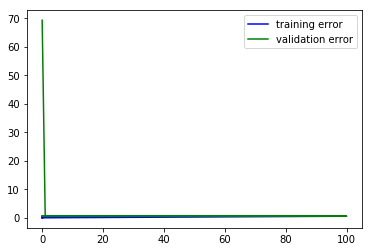

In [14]:
plt.plot(predictions_train_dic.keys(), predictions_train_dic.values(), color = "b", label = "training error")
plt.plot(predictions_valid_dic.keys(), predictions_valid_dic.values(), color = "g", label = "validation error")
plt.legend()

In [15]:
predictions_train_dic

{0: 0.044712733655801959,
 1e-08: 0.00069651782626978687,
 1e-07: 0.001032308438438383,
 1e-06: 0.0067756009865905156,
 1e-05: 0.044258013407265831,
 0.0001: 0.31229898365172948,
 0.01: 0.59830867430699919,
 0.1: 0.59830867430699919,
 1: 0.59830867430699919,
 100: 0.59830867430699919}

In [16]:
predictions_valid_dic

{0: 69.287952861701882,
 1e-08: 0.74101583923459069,
 1e-07: 0.65357875820647238,
 1e-06: 0.65693401312469457,
 1e-05: 0.62380879122696387,
 0.0001: 0.60131901519764552,
 0.01: 0.60431792617409408,
 0.1: 0.60431792617409408,
 1: 0.60431792617409408,
 100: 0.60431792617409397}

In [17]:
model = graphlab.recommender.factorization_recommender.create(sf_train, user_id='new_user_id', item_id='new_course_id',target='rating',solver='als',side_data_factorization=False, num_factors = 10, regularization=0.1)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.031964s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.1      |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 53us         | NA                     |

+---------+--------------+------------------------+

| 0       | 34ms         | 0.598309               |

| 1       | 72.083ms     | 0.598309               |

| 2       | 100.405ms    | 0.598309               |

| 3       | 148.187ms    | 0.598309               |

| 4       | 189.413ms    | 0.598309               |

| 5       | 207.756ms    | 0.598309               |

| 6       | 230.166ms    | 0.598309               |

| 7       | 262.763ms    | 0.598309               |

| 8       | 301.814ms    | 0.598309               |

| 9       | 337.179ms    | 0.598309               |

| 10      | 371.202ms    | 0.598309               |

| 11      | 395.981ms    | 0.598309               |

| 12      | 418.525ms    | 0.598309               |

| 13      | 442.323ms    | 0.598309               |

| 14      | 470.159ms    | 0.598309               |

| 15      | 503.83ms     | 0.598309               |

| 16      | 534.978ms    | 0.598309               |

| 17      | 562.684ms    | 0.598309               |

| 18      | 596.105ms    | 0.598309               |

| 19      | 616.679ms    | 0.598309               |

| 20      | 638.337ms    | 0.598309               |

| 21      | 662.42ms     | 0.598309               |

| 22      | 692.586ms    | 0.598309               |

| 23      | 705.736ms    | 0.598309               |

| 24      | 733.598ms    | 0.598309               |

| 25      | 767.566ms    | 0.598309               |

| 26      | 794.962ms    | 0.598309               |

| 27      | 824.277ms    | 0.598309               |

| 28      | 853.946ms    | 0.598309               |

| 29      | 878.054ms    | 0.598309               |

| 30      | 905.453ms    | 0.598309               |

| 31      | 929.015ms    | 0.598309               |

| 32      | 968.029ms    | 0.598309               |

| 33      | 980.776ms    | 0.598309               |

| 34      | 1.01s        | 0.598309               |

| 35      | 1.04s        | 0.598309               |

| 36      | 1.07s        | 0.598309               |

| 37      | 1.10s        | 0.598309               |

| 38      | 1.13s        | 0.598309               |

| 39      | 1.16s        | 0.598309               |

| 40      | 1.17s        | 0.598309               |

| 41      | 1.20s        | 0.598309               |

| 42      | 1.23s        | 0.598309               |

| 43      | 1.26s        | 0.598309               |

| 44      | 1.30s        | 0.598309               |

| 45      | 1.33s        | 0.598309               |

| 46      | 1.35s        | 0.598309               |

| 47      | 1.38s        | 0.598309               |

| 48      | 1.42s        | 0.598309               |

| 49      | 1.46s        | 0.598309               |

| FINAL   | 1.46s        | 0.598309               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [18]:
predictions_test = model.predict(sf_test)
rmse = np.sqrt(mean_squared_error(sf_test['rating'], predictions_test))

In [19]:
model.recommend()

recommendations finished on 1000/12294 queries. users per second: 6636.18

recommendations finished on 2000/12294 queries. users per second: 13030.6

recommendations finished on 3000/12294 queries. users per second: 19168

recommendations finished on 4000/12294 queries. users per second: 25111

recommendations finished on 5000/12294 queries. users per second: 30842.9

recommendations finished on 6000/12294 queries. users per second: 36385.5

recommendations finished on 7000/12294 queries. users per second: 41655

recommendations finished on 8000/12294 queries. users per second: 46778.2

recommendations finished on 9000/12294 queries. users per second: 51754.8

recommendations finished on 10000/12294 queries. users per second: 56597.9

recommendations finished on 11000/12294 queries. users per second: 61303.2

recommendations finished on 12000/12294 queries. users per second: 65150.5

new_user_id,new_course_id,score,rank
90879,495,4.77225723057,1
90879,555,4.77225723057,2
90879,594,4.77225723057,3
90879,342,4.77225723057,4
90879,803,4.77225723057,5
90879,614,4.77225723057,6
90879,418,4.77225723057,7
90879,644,4.77225723057,8
90879,266,4.77225723057,9
90879,365,4.77225723057,10


In [20]:
predictions_test

dtype: float
Rows: 12867
[4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772257230570364, 4.772

In [21]:
print "test set rmse: ", rmse

test set rmse:  0.616235861638
